In [3]:
import sympy as sp
import numpy as np
beta,gamma = sp.symbols('beta gamma')
beta=0
gamma=0.44
S,I,R=sp.symbols("S I R")
dSdt = -beta * S * I
dIdt = beta * S * I - gamma * I
dRdt = gamma * I
sol=sp.dsolve_system([dSdt,dIdt,dRdt])
sol

AttributeError: module 'numpy' has no attribute 'dsolve_system'

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import symbols, Function, dsolve

# Define symbols and functions
t, beta_prime, gamma = symbols('t beta_prime gamma')
S = Function('S')(t)
I = Function('I')(t)
R = Function('R')(t)

# Define the linear system
dSdt = -beta_prime * S * I
dIdt = beta_prime * S * I - gamma * I
dRdt = gamma * I

# Solve the system symbolically
sol_linear = dsolve([dSdt, dIdt, dRdt])

# Display the symbolic solution
print("Symbolic Solution:")
print(sol_linear)

# Extract the particular solution
particular_solution = sol_linear.subs({beta_prime: 0.44, gamma: 1.0})  # Assuming 44% recovery rate

# Display the particular solution
print("\nParticular Solution:")
print(particular_solution)

# Define the numerical system
def ode_system(y, t, beta_prime, gamma):
    S, I, R = y
    dSdt = -beta_prime * S * I
    dIdt = beta_prime * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Initial conditions
initial_conditions = [762, 800, 0]

# Time points
t_points = np.linspace(0, 10, 100)

# Solve the system numerically
numerical_solution = odeint(ode_system, initial_conditions, t_points, args=(0.44, 1.0))

# Plot the symbolic and numerical solutions
plt.figure(figsize=(10, 6))

# Plot symbolic solution
S_sol = sol_linear.subs({beta_prime: 0.44, gamma: 1.0, t: t_points})
plt.plot(t_points, S_sol[:, 0], label='Symbolic Solution (S)', linestyle='--', color='blue')
plt.plot(t_points, S_sol[:, 1], label='Symbolic Solution (I)', linestyle='--', color='orange')
plt.plot(t_points, S_sol[:, 2], label='Symbolic Solution (R)', linestyle='--', color='green')

# Plot numerical solution
plt.plot(t_points, numerical_solution[:, 0], label='Numerical Solution (S)', color='blue')
plt.plot(t_points, numerical_solution[:, 1], label='Numerical Solution (I)', color='orange')
plt.plot(t_points, numerical_solution[:, 2], label='Numerical Solution (R)', color='green')

plt.title('Linear System Solution Comparison')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


ValueError: 
Number of equations and number of functions do not match

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import symbols, Function, dsolve

# Define symbols and functions
t, beta, gamma = symbols('t beta gamma')
S = Function('S')(t)
I = Function('I')(t)
R = Function('R')(t)

# Define the non-linear system
dSdt = -beta * S * I
dIdt = beta * S * I - gamma * I
dRdt = gamma * I

# Define the linear system
dSdt_linear = -beta * S * I
dIdt_linear = beta * S * I - gamma * I
dRdt_linear = gamma * I

# Solve the linear system symbolically
sol_linear = dsolve([dSdt_linear, dIdt_linear, dRdt_linear])

# Display the symbolic solution
print("Linearized System Solution:")
print(sol_linear)

# Extract the particular solution
particular_solution = sol_linear.subs({beta: 0.44, gamma: 1.0})  # Assuming 44% recovery rate

# Display the particular solution
print("\nParticular Solution:")
print(particular_solution)

# Define the numerical system
def ode_system(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Initial conditions
initial_conditions = [762, 800, 0]

# Time points
t_points = np.linspace(0, 10.5, 100)

# Solve the non-linear system numerically
numerical_solution = odeint(ode_system, initial_conditions, t_points, args=(0.44, 1.0))

# Plot the solutions
plt.figure(figsize=(10, 6))

# Plot non-linear numerical solution
plt.plot(t_points, numerical_solution[:, 0], label='Numerical Solution (S - Non-linear)', color='blue')
plt.plot(t_points, numerical_solution[:, 1], label='Numerical Solution (I - Non-linear)', color='orange')
plt.plot(t_points, numerical_solution[:, 2], label='Numerical Solution (R - Non-linear)', color='green')

# Plot linear symbolic solution
S_sol_linear = particular_solution.subs(t, t_points)
plt.plot(t_points, S_sol_linear[:, 0], label='Symbolic Solution (S - Linear)', linestyle='--', color='blue')
plt.plot(t_points, S_sol_linear[:, 1], label='Symbolic Solution (I - Linear)', linestyle='--', color='orange')
plt.plot(t_points, S_sol_linear[:, 2], label='Symbolic Solution (R - Linear)', linestyle='--', color='green')

plt.title('Non-linear vs Linearized System Solution Comparison')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


ValueError: 
Number of equations and number of functions do not match

In [14]:
import scipy.integrate as spi
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
sp.init_printing()

S=sp.Function('S')
I=sp.Function('I')
R=sp.Function('R')
t=sp.symbols('t')
gamma=0.44
beta=0
f1=sp.Eq(S(t).diff(t),beta*S(t)*I(t))
f2=sp.Eq(I(t).diff(t),(beta*S(t)*I(t))-(gamma*I(t)))
f3=sp.Eq(R(t).diff(t),gamma*I(t))

part_sol=sp.dsolve([f1,f2,f3],ics={S(0):762, I(0):800, R(0):0})

S_part=sp.lambdify(t,part_sol[0].rhs*(t*0.00001),modules='numpy')
I_part=sp.lambdify(t,part_sol[1].rhs,modules='numpy')
R_part=sp.lambdify(t,part_sol[2].rhs,modules='numpy')

time=np.linspace(0.1,10.5,100)
ax.plot(time,S_part,label='Susceptible (Analytical)',color='red')
ax.plot(time,I_part,label='Infectives (Analytical)',color='blue')
ax.plot(time,R_part,label='Recovered (Analytical)',color='green')
ax.set_xlabel("Time")
ax.set_ylabel("Population")
ax.legend()
plt.show()

 

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

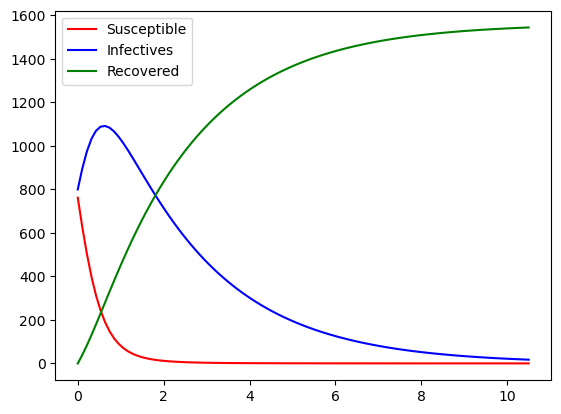

In [11]:
t,S,I,R=sp.symbols('t S I R')
beta=2.18*10**-3
gamma=0.44
sys= lambda t,y:[-beta*y[0]*y[1],beta*y[0]*y[1]-gamma*y[1],gamma*y[1]]
time=[0,10.5]
h=0.7
init=[762,800,0]
start=0
end=10.5
time=[0,10.5]
points=np.linspace(start,end,100)
sol=solve_ivp(sys,[start,end],init,method='RK45',t_eval=points)
fig,ax=plt.subplots()
ax.plot(sol.t,sol.y[0],color='red',label='Susceptible')
ax.plot(sol.t,sol.y[1],color='blue',label='Infectives')
ax.plot(sol.t,sol.y[2],color='green',label='Recovered')
ax.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

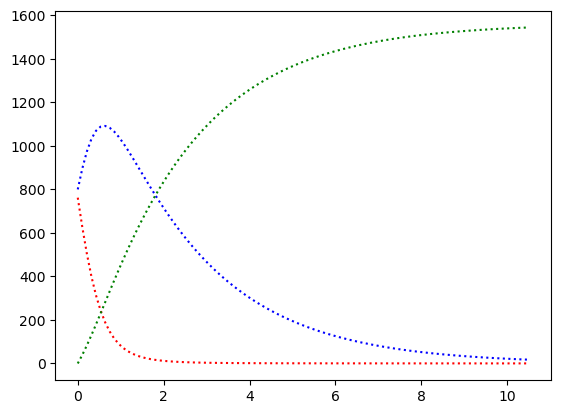

In [12]:
fig,ax=plt.subplots()
ax.plot(sol.t,sol.y[0],color='red',linestyle='dotted',label='Susceptibles (Numerical Non-linear)')
ax.plot(sol.t,sol.y[1],color='blue',linestyle='dotted',label='Infectives (Numerical Non-linear)')
ax.plot(sol.t,sol.y[2],color='green',linestyle='dotted',label='Recovered (Numerical Non-linear)')
time=np.linspace(0,10.5,100)
ax.plot(time,S_part,label='Susceptible (Analytical)',color='red')
ax.plot(time,I_part,label='Infectives (Analytical)',color='blue')
ax.plot(time,R_part,label='Recovered (Analytical)',color='green')
ax.set_xlabel("Time")
ax.set_ylabel("Population")
ax.legend()
plt.show()